<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-1-Build/blob/master/Mountain_Scott_DS12_Build_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats
%matplotlib inline

#Please see citations at bottom of notebook 

In [0]:
#!wget https://www.kaggle.com/aljarah/xAPI-Edu-Data/download/P8ng4BD3kbFHodBFUtZb%2Fversions%2FJ4rfUsb7FkVcx6O8Xxce%2Ffiles%2FxAPI-Edu-Data.csv?datasetVersionNumber=1

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. Such system provides users with a synchronous access to educational resources from any device with Internet connection.

The data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. The experience API helps the learning activity providers to determine the learner, activity and objects that describe a learning experience. The dataset consists of 480 student records and 16 features. The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

The dataset consists of 305 males and 175 females. The students come from different origins such as 179 students are from Kuwait, 172 students are from Jordan, 28 students from Palestine, 22 students are from Iraq, 17 students from Lebanon, 12 students from Tunis, 11 students from Saudi Arabia, 9 students from Egypt, 7 students from Syria, 6 students from USA, Iran and Libya, 4 students from Morocco and one student from Venezuela.

The dataset is collected through two educational semesters: 245 student records are collected during the first semester and 235 student records are collected during the second semester.

The data set includes also the school attendance feature such as the students are classified into two categories based on their absence days: 191 students exceed 7 absence days and 289 students their absence days under 7.

This dataset includes also a new category of features; this feature is parent parturition in the educational process. Parent participation feature have two sub features: Parent Answering Survey and Parent School Satisfaction. There are 270 of the parents answered survey and 210 are not, 292 of the parents are satisfied from the school and 188 are not.  [cited directly from Kaggle](https://www.kaggle.com/aljarah/xAPI-Edu-Data/version/1)

Attributes

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

#Cleaning and Renaming columns

- Gender has four categories (caused by extra commas): "Male", "Male,", "Female", "Female,"
- Country names are in different cases and some are misspelled
- Some column names have trailing spaces and inner spaces should be replaced with text for dot notation
- One student (in row 32) has conflicting data for Educational Stage
- Renamed "Mom" to "Mother"
- Change "Under-7" category of "Student Absense Days" column to "7 or less"
- Rename "Total" to "Academic_Performance"
- Drop rows with ambiguous data


In [0]:
path = '/content/drive/My Drive/Datasets/xAPI-Edu-Data.csv'

edu_data = pd.read_csv(path)

In [214]:
edu_data.head()

,Gender,Nationality,Place of birth,Educational Stages,Grade Levels,Section ID,Topic,Semester,Parent responsible for student,Raised hand,Visited resources,Viewing announcements,Discussion groups,Parent Answering Survey,ParentschoolSatisfaction,StudentAbsenceDays,Total
0,Male,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,First,Father,15,16,2,20,Yes,Good,Under-7,Middle-Level
1,Male,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,First,Father,20,20,3,25,Yes,Good,Under-7,Middle-Level
2,Male,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,First,Father,10,7,0,30,No,Bad,Above-7,Low-Level
3,Male,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,First,Father,30,25,5,35,No,Bad,Above-7,Low-Level
4,Male,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,First,Father,40,50,12,50,No,Bad,Above-7,Middle-Level


In [215]:
edu_data.columns

Index(['Gender', 'Nationality', 'Place of birth', 'Educational Stages ',
       'Grade Levels', 'Section ID', 'Topic', 'Semester',
       'Parent responsible for student', 'Raised hand', 'Visited resources',
       'Viewing announcements', 'Discussion groups', 'Parent Answering Survey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Total'],
      dtype='object')

In [0]:
edu_data.columns = edu_data.columns.str.strip().str.replace(" ", "_")

In [217]:
edu_data.columns

Index(['Gender', 'Nationality', 'Place_of_birth', 'Educational_Stages',
       'Grade_Levels', 'Section_ID', 'Topic', 'Semester',
       'Parent_responsible_for_student', 'Raised_hand', 'Visited_resources',
       'Viewing_announcements', 'Discussion_groups', 'Parent_Answering_Survey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Total'],
      dtype='object')

In [0]:
edu_data = edu_data.rename(columns={"Topic":"Subject", "Total":"Academic_Performance"})


In [219]:
edu_data.columns

Index(['Gender', 'Nationality', 'Place_of_birth', 'Educational_Stages',
       'Grade_Levels', 'Section_ID', 'Subject', 'Semester',
       'Parent_responsible_for_student', 'Raised_hand', 'Visited_resources',
       'Viewing_announcements', 'Discussion_groups', 'Parent_Answering_Survey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays',
       'Academic_Performance'],
      dtype='object')

In [220]:
edu_data.Nationality.unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [0]:
edu_data.Nationality = edu_data.Nationality.replace({"KuwaIT":"Kuwait","lebanon":"Lebanon", 
                                                     "SaudiArabia":"Saudi Arabia", "venzuela":"Venezuela", 
                                                     "Tunis":"Tunisia"})

In [222]:
edu_data.Nationality.unique()

array(['Kuwait', 'Lebanon', 'Egypt', 'Saudi Arabia', 'USA', 'Jordan',
       'Venezuela', 'Iran', 'Tunisia', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [0]:
edu_data.Parent_responsible_for_student = edu_data.Parent_responsible_for_student.replace('mom', "Mother")

In [224]:
edu_data.Gender.unique()

array(['Male', 'Female', 'Male,', 'Female,'], dtype=object)

In [0]:
edu_data.Gender = edu_data.Gender.str.replace(",", "")   #removing the extra comma after some text in the Gender category 

In [226]:
edu_data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [0]:
edu_data.Place_of_birth = edu_data.Place_of_birth.replace({"KuwaIT":"Kuwait","lebanon":"Lebanon", "SaudiArabia":"Saudi Arabia", "venzuela":"Venezuela", "Tunis":"Tunisia"})

In [228]:
edu_data.groupby("Educational_Stages").Grade_Levels.value_counts()

Educational_Stages  Grade_Levels
HighSchool          G-11             13
                    G-12             11
                    G-09              5
                    G-10              4
MiddleSchool        G-08            116
                    G-07            100
                    G-06             32
lowerlevel          G-02            147
                    G-04             48
                    G-05              3
                    G-07              1
Name: Grade_Levels, dtype: int64

Based on the groupby, it looks like one observation was categorized 
as 'lowerlevel" even though the associated grade level is "G07".  I think it would be better to drop the row rather than speculate on the proper placement of the row. 

In [229]:
edu_data.query('Grade_Levels =="G-07"').query('Educational_Stages=="lowerlevel"')

,Gender,Nationality,Place_of_birth,Educational_Stages,Grade_Levels,Section_ID,Subject,Semester,Parent_responsible_for_student,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups,Parent_Answering_Survey,ParentschoolSatisfaction,StudentAbsenceDays,Academic_Performance
32,Female,Kuwait,Kuwait,lowerlevel,G-07,A,IT,First,Father,2,19,10,50,Yes,Good,Above-7,Low-Level


In [230]:
edu_data.shape

(480, 17)

In [0]:
edu_data = edu_data.drop(32)

In [232]:
edu_data.shape

(479, 17)

In [233]:
edu_data.reset_index(drop=True)

,Gender,Nationality,Place_of_birth,Educational_Stages,Grade_Levels,Section_ID,Subject,Semester,Parent_responsible_for_student,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups,Parent_Answering_Survey,ParentschoolSatisfaction,StudentAbsenceDays,Academic_Performance
0,Male,Kuwait,Kuwait,lowerlevel,G-04,A,IT,First,Father,15,16,2,20,Yes,Good,Under-7,Middle-Level
1,Male,Kuwait,Kuwait,lowerlevel,G-04,A,IT,First,Father,20,20,3,25,Yes,Good,Under-7,Middle-Level
2,Male,Kuwait,Kuwait,lowerlevel,G-04,A,IT,First,Father,10,7,0,30,No,Bad,Above-7,Low-Level
3,Male,Kuwait,Kuwait,lowerlevel,G-04,A,IT,First,Father,30,25,5,35,No,Bad,Above-7,Low-Level
4,Male,Kuwait,Kuwait,lowerlevel,G-04,A,IT,First,Father,40,50,12,50,No,Bad,Above-7,Middle-Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,Female,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,Second,Father,5,4,5,8,No,Bad,Above-7,Low-Level
475,Female,Jordan,Jordan,MiddleSchool,G-08,A,Geology,First,Father,50,77,14,28,No,Bad,Under-7,Middle-Level
476,Female,Jordan,Jordan,MiddleSchool,G-08,A,Geology,Second,Father,55,74,25,29,No,Bad,Under-7,Middle-Level
477,Female,Jordan,Jordan,MiddleSchool,G-08,A,History,First,Father,30,17,14,57,No,Bad,Above-7,Low-Level


In [234]:
edu_data.Educational_Stages.unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

In [0]:
edu_data.Educational_Stages = edu_data.Educational_Stages.replace({'lowerlevel': "Primary", "HighSchool": "High School", "MiddleSchool":"Middle School"})

In [236]:
edu_data.Educational_Stages.unique()

array(['Primary', 'Middle School', 'High School'], dtype=object)

In [237]:
edu_data.Semester.value_counts()

First     243
Second    235
F           1
Name: Semester, dtype: int64

In [238]:
edu_data.query("Semester=='F'")

,Gender,Nationality,Place_of_birth,Educational_Stages,Grade_Levels,Section_ID,Subject,Semester,Parent_responsible_for_student,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups,Parent_Answering_Survey,ParentschoolSatisfaction,StudentAbsenceDays,Academic_Performance
332,Female,Jordan,Jordan,Primary,G-02,A,French,F,Mother,10,90,30,21,No,Good,Under-7,Middle-Level


In [0]:
edu_data = edu_data.drop(332).reset_index(drop=True)  #remove row with semester labeled "F"

In [0]:
edu_data.rename(columns={"ParentschoolSatisfaction":"Parent_School_Satisfaction", "StudentAbsenceDays": "Days_Absent"}, inplace=True)

In [0]:
edu_data.Days_Absent = edu_data.Days_Absent.replace({"Under-7": "7 or less"})

In [242]:
edu_data.Academic_Performance.unique()

array(['Middle-Level', 'Low-Level', 'High-Level', '76'], dtype=object)

In [243]:
edu_data.Academic_Performance.value_counts() #meaning of "76" is unclear; will be dropped

Middle-Level    209
High-Level      142
Low-Level       126
76                1
Name: Academic_Performance, dtype: int64

In [244]:
edu_data.query("Academic_Performance=='76'")

,Gender,Nationality,Place_of_birth,Educational_Stages,Grade_Levels,Section_ID,Subject,Semester,Parent_responsible_for_student,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups,Parent_Answering_Survey,Parent_School_Satisfaction,Days_Absent,Academic_Performance
125,Female,Iran,Iran,Primary,G-02,C,IT,First,Father,2,9,7,55,Yes,Good,7 or less,76


In [0]:
edu_data = edu_data.drop(125).reset_index(drop=True)

In [246]:
edu_data.columns

Index(['Gender', 'Nationality', 'Place_of_birth', 'Educational_Stages',
       'Grade_Levels', 'Section_ID', 'Subject', 'Semester',
       'Parent_responsible_for_student', 'Raised_hand', 'Visited_resources',
       'Viewing_announcements', 'Discussion_groups', 'Parent_Answering_Survey',
       'Parent_School_Satisfaction', 'Days_Absent', 'Academic_Performance'],
      dtype='object')

In [0]:
#Continuous Variables: Raised_hand , Visited_resources, Viewing_announcements, Discussion_groups 

#todo

1. comment on gender proportions (and the importance of stratification)
2. country-of-origin proportion
3. how long were students exposed to the LMS (was it new for Fall semester?)
4. comment on the rigor of combining parent participation 


###Proposed groupbys:

1. gender (raised hand, visited resources, discussion groups)
2. educational stages
3. Topic
4. Semester

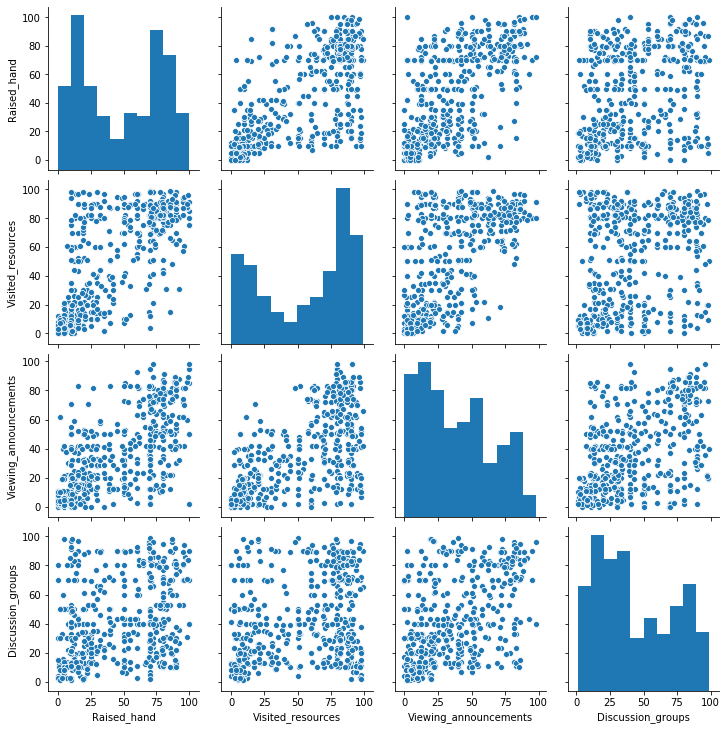

In [248]:
import seaborn as sns
sns.pairplot(edu_data)

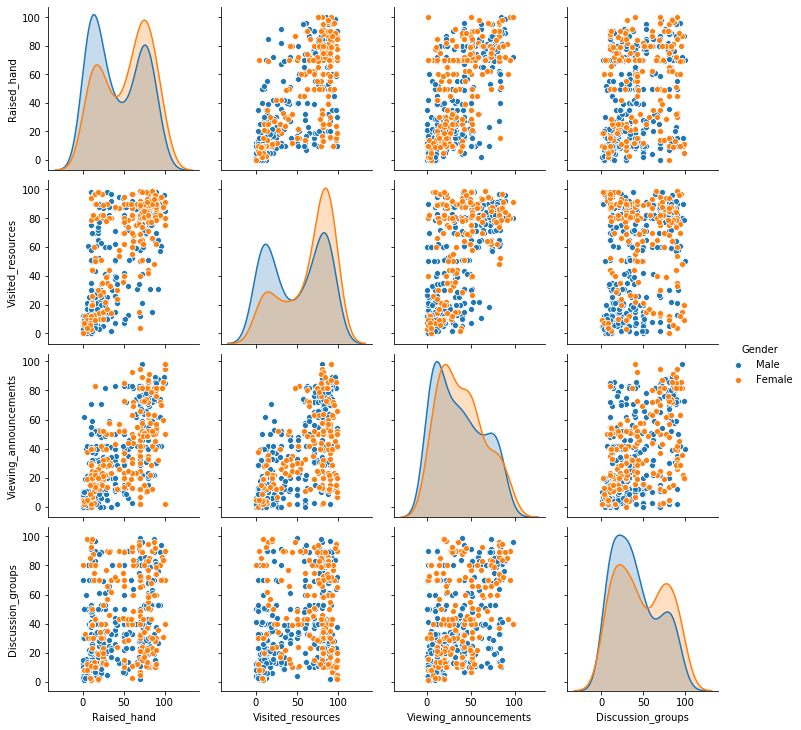

In [249]:
sns.pairplot(edu_data, hue='Gender')

##EDA Observation 1: Bimodal distribution of continuous variables

The plots along the diagonal on the plot grid reveal two peaks (also known as "modes"), making them bimodal. Bimodal distributions can provide important information about [the nature of an investigated variable](https://documentation.statsoft.com/STATISTICAHelp.aspx?path=Glossary/GlossaryTwo/B/BimodalDistribution). Bimodality can indicate polarization of opinions, non-homogenous data, or problems with the measurement instrument. 

In this case, I think the modality may stem from using non-homogenous data.  I will experiment with different hues to determine which underlying distributions are the source of the peaks. 

In [250]:
edu_data.columns

Index(['Gender', 'Nationality', 'Place_of_birth', 'Educational_Stages',
       'Grade_Levels', 'Section_ID', 'Subject', 'Semester',
       'Parent_responsible_for_student', 'Raised_hand', 'Visited_resources',
       'Viewing_announcements', 'Discussion_groups', 'Parent_Answering_Survey',
       'Parent_School_Satisfaction', 'Days_Absent', 'Academic_Performance'],
      dtype='object')

In [0]:
#edu_data_filtered = edu_data[edu_data.Grade_Levels.isin(['G-05'])] #,'G-09','G-12', 'G-10', 'G-11'

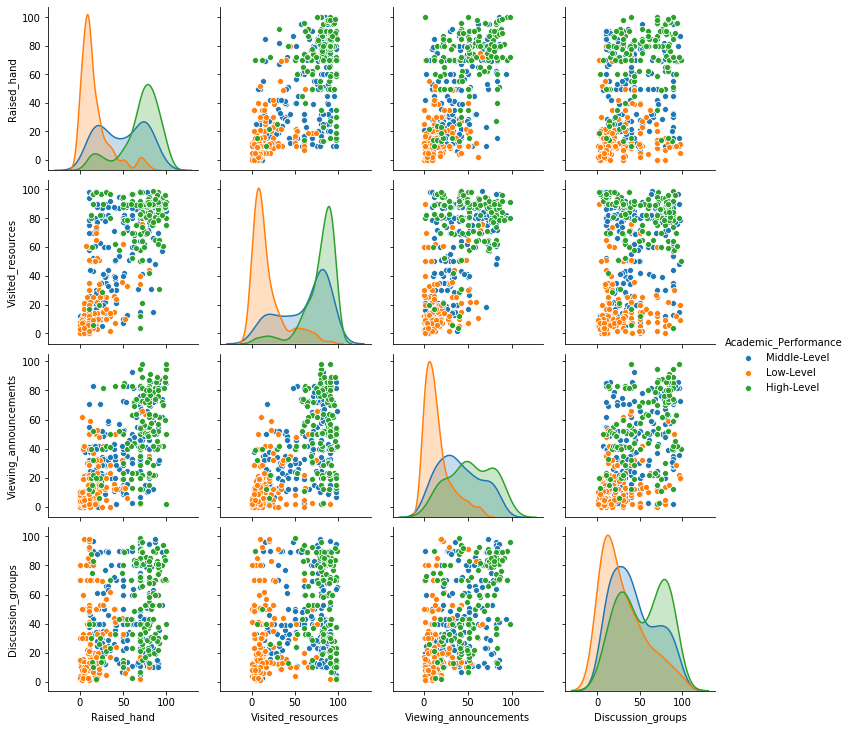

In [252]:
sns.pairplot(edu_data, hue='Academic_Performance')

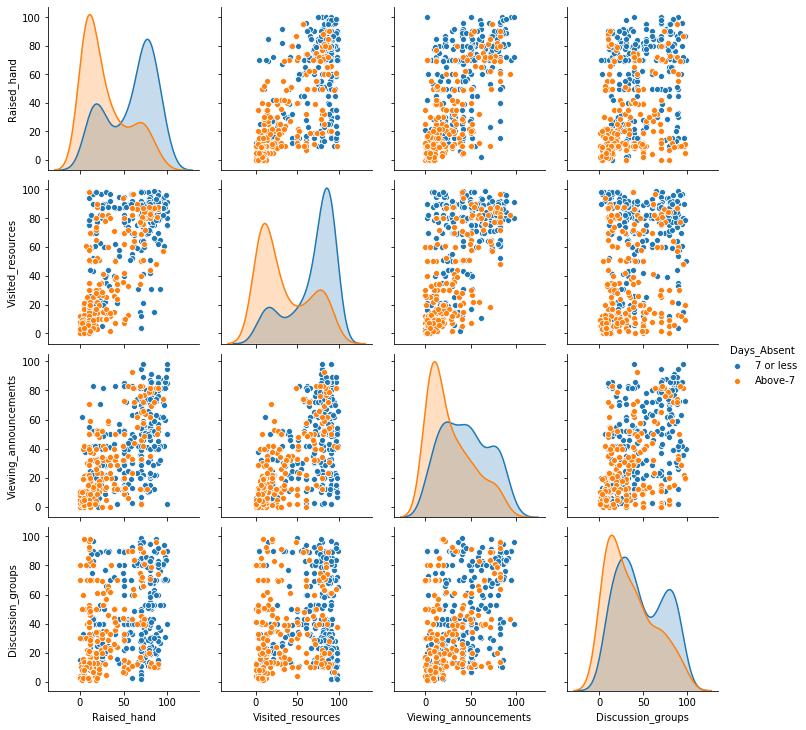

In [253]:
sns.pairplot(edu_data, hue='Days_Absent')

##EDA Observation 2: Bimodality appears explained by both number of days absent and academic performance.  

After some experimentation, it seem that grouping the samples into categories indicating their academic performance or number of days absent does a better job of explaining the modality of the graphs than other features.  On average, based on the graphs, lower-performing students raised their hands, viewed announcements, and viewed resources **less** than mid- to high-performing students.  

The same comparison can be made concerning students with more than 7 days absent.  Participation in discussion groups, however, appears to be more evenly spread between groups. This could mean that frequency of participation in discussion groups, as a simple metric, offers little information about the how well a student understands the material.


To support this interpretation with some actual numbers, I'll find the mean and standard deviation of both groups.    

In [254]:
edu_data.groupby('Academic_Performance').mean()

,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups
Academic_Performance,,,,
High-Level,70.288732,78.746479,53.380282,53.661972
Low-Level,17.007937,18.317460,15.619048,30.682540
Middle-Level,49.349282,60.741627,41.177033,43.846890


In [255]:
edu_data.groupby('Academic_Performance').std()

,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups
Academic_Performance,,,,
High-Level,22.543443,19.356468,25.055041,27.195871
Low-Level,17.226257,19.263499,15.367424,25.755357
Middle-Level,26.686526,28.064319,24.074649,26.186379


In [256]:
edu_data.groupby('Days_Absent').mean()

,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups
Days_Absent,,,,
7 or less,58.735192,68.334495,44.846690,48.264808
Above-7,29.373684,34.594737,27.805263,35.778947


In [257]:
edu_data.groupby('Days_Absent').std()

,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups
Days_Absent,,,,
7 or less,27.958753,27.454214,26.033683,27.169494
Above-7,25.847791,30.327646,24.164756,26.850627


The similarity in standard deviations between both sub-groups (Days_absent and Academic Performance) could mean that **the frequency of participation in discussion groups, as a simple metric, offers little information about the how well a student understands the material.**

However, this hypothesis requires stronger statistical support. I will attempt to address this hypothesis eventually, but there are two  pressing issues regarding drawing conclusions from this dataset. 

1.  How do I determine the relationship between continuous and categorical variables?  What would be a more statistically rigorous way of explaining, for example, the potential correlation between the frequency of raising one's hand (continuous) and academic performance (categorical)?

2.   The bimodality suggests that I should split the dataset into two seperate dataframes. But which should I choose?  
  * Two dataframes based on academic 
performance (i.e., combining middle and high performers) **or**
  * Two dataframes based on absenteeism 

Before tackling these issues, I will first determine the correlation of numerical variables in the dataset.  This is a more straightforward process than trying to find numerical-to-categorical correlation. 



In [0]:
#edu_data.Nationality.value_counts() #low representation for countries besides Kuwait and Jordan

In [0]:
#edu_data.Grade_Levels.value_counts()  #low level of representation of G-05,09,10,11,12 but I'm not drawing conclusions on a per-grade basis

In [0]:
#academic_performance, grade_level, Days absent (bimodal candidates)

In [0]:
#edu_data.Academic_Performance.value_counts()

In [0]:
#edu_data.Days_Absent.value_counts()

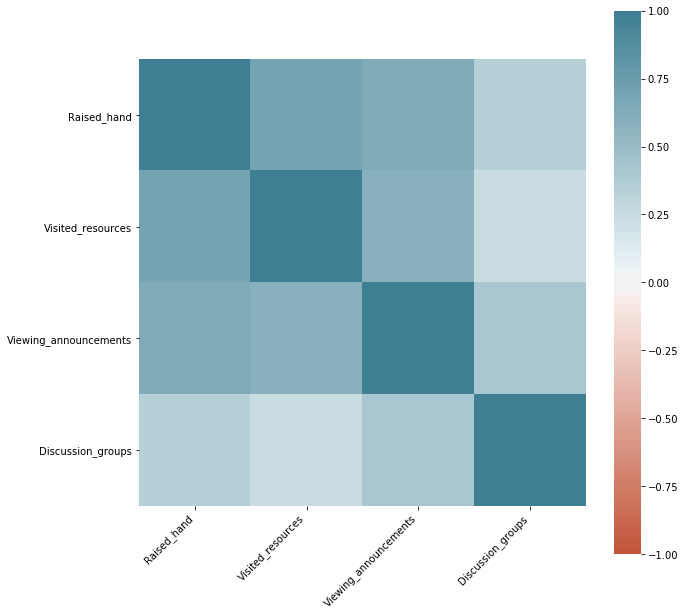

In [263]:
corr = edu_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [264]:
corr

,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups
Raised_hand,1.000000,0.693896,0.641946,0.341751
Visited_resources,0.693896,1.000000,0.593617,0.248183
Viewing_announcements,0.641946,0.593617,1.000000,0.419857
Discussion_groups,0.341751,0.248183,0.419857,1.000000


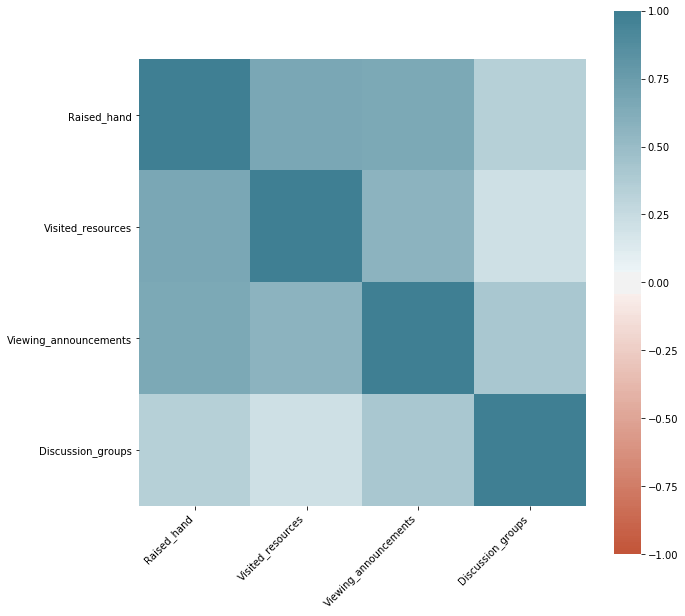

In [265]:
spearman_corr = edu_data.corr(method="spearman")
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    spearman_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [266]:
spearman_corr

,Raised_hand,Visited_resources,Viewing_announcements,Discussion_groups
Raised_hand,1.000000,0.665606,0.650304,0.341575
Visited_resources,0.665606,1.000000,0.571352,0.212886
Viewing_announcements,0.650304,0.571352,1.000000,0.407007
Discussion_groups,0.341575,0.212886,0.407007,1.000000


##EDA Observation 3: moderately strong correlations between three continuous variables

Raising hands, viewing announcements, and visiting resources have strong correlations (between different pairs).  Maybe these factors can be combined or examined separately for comparing with final grade  (“Total Category”).

An interesting observation is that **the correlation between the frequency that students raise their hands in class and the frequency of participation in discussion groups is not very strong**. This may be because student participation may not be adequately proxied by how often students raise their hands.  Students raise their hands both to ask questions and to give answers.  So students who are having trouble understanding may be mixed with students who are demonstrating understanding.  Conversely, students who participate often in the non-virual classroom may not necessarily find online discussions to be as stimulating.  These are of course, only two of many hypotheses that derived from the complexity of interpreting learning metrics. Additionally, 

1.   Correlation does not imply causation
2.   Determining the threshold for a useful correlation coefficient is often a judgement call. Notably, none of the coefficients in the pearson or spearman correlation matrices are above 0.8.



###Looking for possible correlations between categorical variables using the Cramer's V coefficient

Cramer's V is a statistical technique used to calculate associations between categorical variables. It is preferable to simply using χ<super><small>2</small></super> because the coefficient provides more information about the strenght of correlation.  

To minimize the coding necessary to arrive at Cramer's V, I'll be using the [dython](https://github.com/shakedzy/dython/blob/master/dython/nominal.py) package to plot categorical associations. 

I also benefited tremendously from the explantion of Cramer's V found [here](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). 

In [267]:
pip install dython


In [268]:
pip install git+https://github.com/shakedzy/dython.git


  Cloning https://github.com/shakedzy/dython.git to /tmp/pip-req-build-3ppi2s6y
  Running command git clone -q https://github.com/shakedzy/dython.git /tmp/pip-req-build-3ppi2s6y
  Created wheel for dython: filename=dython-0.4.0-cp36-none-any.whl size=15233 sha256=715a49e341cc77e1c97072201502e724c86744f5a93d9e965b8d86a2f8a4de0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-3xac2d4r/wheels/22/e0/2a/eb6a41c2901366c786f2cc8d9bcd73911e9a1e36c5f06be49b
Successfully built dython


In [0]:
edu_categorical_data = edu_data.select_dtypes(exclude="number").copy()

In [0]:
from scipy.stats import chi2_contingency


In [0]:
import dython.nominal as dynom

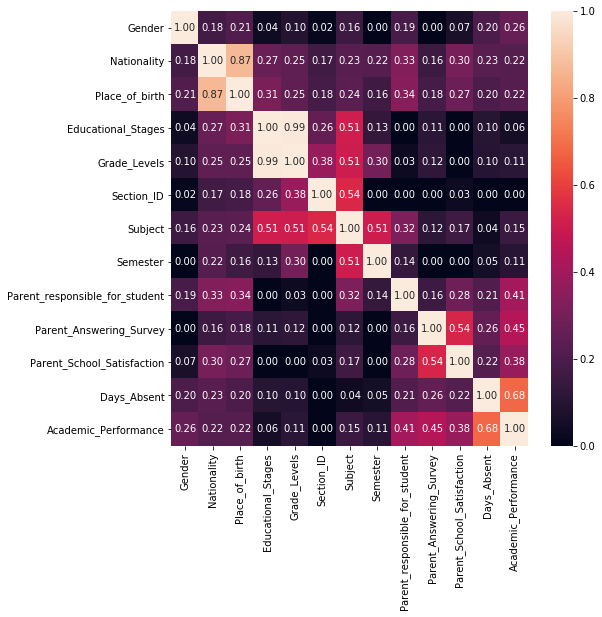

In [272]:
fig, ax = plt.subplots(figsize=(8,8))

dynom.associations(edu_categorical_data, ax=ax)

##EDA Observation 4: Days Absent and Academic Performance have the highest *non-trivial* association. 

The above matrix was very useful helping me find categorical associations. Nevertheless, a drawback to using Cramer's V is that its output is symmetric.  In other words, there is no way to tell if absenteeism provides more information about academic performance than academic provides about absenteeism. Using mathematical notation to describe this symmetry 

Cramer's V: V(x,y)=V(y,x).


To address this downsides of this symmetry, I'll use the Uncertainty Coefficient, also known as Theil's U.  Thanks to the dython package, calculating Theil's U coefficients is just a matter of chaning the "theil_u" parameter of the associations function to "True"





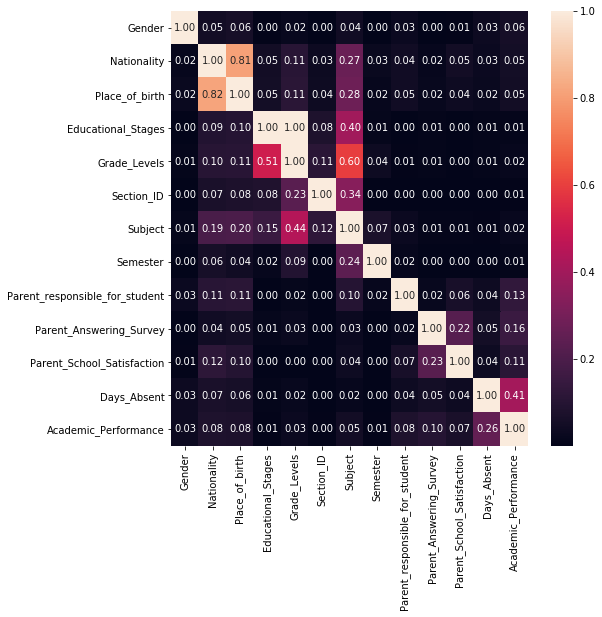

In [273]:
fig, ax = plt.subplots(figsize=(8,8))

dynom.associations(edu_categorical_data, theil_u=True, ax=ax)

##EDA Observation 5: Absenteeism matters more

With a coefficient of **.41**, we now see that absenteeism ("Days Absent") provides more information about Academic Performance than Academic Performance provides about absenteeism (**.26**). 

------------------
Now that I have found what correlations between numerical variables and associations between categorical variables, it would be great to be able to find associations between numerical and categorical variables--such as my earlier example of comparing frequency of hand-raising to academic performance.  Such mix-matched comparisons can be achieved by yet another statistical technique: The correlation ratio. 

Like Theil's U, the correlation ratio also assumes asymmetry, so there is less information loss when looking at the association between variables. The correlation ratio can be considered the [ nonlinear equivalent of the correlation coefficient.](https://dictionary.apa.org/correlation-ratio). Because there is no direct way to linearly plot categorical and numerical variables (how would "gender" for example, fit on a number line?) without manipulation, the correlation ratio can be used to infer association.  

**Note**: This isn't the only way to compare categorical and numerical variables. In fact, there is an intriguing paper about using new coefficient, φ<sub>K</sub>, for non-linear variable comparisons published on Cornell's open archive [here](https://arxiv.org/pdf/1811.11440.pdf). 

<p>In order to use the <em>correlation_ratio</em> function from the dython package, I need to separate continuous data columns into their own dataframe.  I can then use the <strong>a single column</strong> from the categorical dataframe I made earlier (edu_categorical_data) as the first parameter of <em>correlation_ratio</em> and <strong>a single column</strong> from the numerical dataframe as the second parameter</p>

In [0]:
edu_numerical_data = edu_data.select_dtypes(include="number").copy()  #extract numerical columns

In [275]:
edu_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 4 columns):
Raised_hand              477 non-null int64
Visited_resources        477 non-null int64
Viewing_announcements    477 non-null int64
Discussion_groups        477 non-null int64
dtypes: int64(4)
memory usage: 15.0 KB


In [276]:
dynom.correlation_ratio(edu_categorical_data.loc[:,"Gender"], edu_numerical_data.loc[:,"Raised_hand"])  #Example using two columns

0.16321421901968566

<p>The correlation ratio answers the question:</p>

<h3>Given a continuous number, how well can you know to which category it is associated?* <small>(Zychlinski, 2018 [<em>paraphrased</em>])</small></h3>

<p>According to the ratio, we can see that raising hands in class is not strongly associated with gender.</p>

<p>But wait! I do not want to go through the tedious process of a column into each parameter of the correlation_ratio function and recording the result.  This means that I need to <strong>make a custom function</strong> to do it for me. </p>

In [277]:
len(edu_categorical_data.T)

13

In [278]:
len(edu_numerical_data.T)

4

In [0]:
def dataframe_corr_ratio(cat_data,num_data):
  ratio_list = []
  ratio_names = []
  for i in range(len(cat_data.T)):
    for j in range(len(num_data.T)):
      new_ratio = dynom.correlation_ratio(cat_data.iloc[:,i], num_data.iloc[:,j])
      new_name =  num_data.iloc[:,j].name +  " ⟶ " + cat_data.iloc[:,i].name 
      ratio_list.append(new_ratio)
      ratio_names.append(new_name)
  return list(zip(ratio_names, ratio_list))

<p>Then, the process of feeding the returned list to a dataframe is straightforward (and could technically be refactored to be part of the custom function).</p>

In [0]:
corr_ratio_df = pd.DataFrame(dataframe_corr_ratio(edu_categorical_data, 
                        edu_numerical_data), columns=["Relationship", "Ratio"])

In [281]:
corr_ratio_df.sort_values("Ratio", ascending=False).nlargest(5, columns="Ratio")

,Relationship,Ratio
49,Visited_resources ⟶ Academic_Performance,0.702648
48,Raised_hand ⟶ Academic_Performance,0.653531
50,Viewing_announcements ⟶ Academic_Performance,0.541170
45,Visited_resources ⟶ Days_Absent,0.500485
44,Raised_hand ⟶ Days_Absent,0.468823



<p>Thus, as seen in the dataframe above, in theory, if I were to pick a number from the "Raised hand" column, I could determine if that number belongs to a specific category of "Academic Performance" ("Low-level", "Middle-level", or "High-level") with greater certainty than if I were to choose the same number from "Raised hand" and attempted to categorize it correctly under "Days Absent". </p> 

<h2>Processing the data to gain insights</h2>
<h3><em>Running a Random Forest Classifier on the full dataset</em></h3>

<p>Previously, we were only concerned with the relationship between variables without choosing a specific variable of interest.  This variable of interest is often called the "dependent" or "target" variable. </p> 

<p>Because an educator might be most concerned with learning outcomes, the "Academic Performance" is a good choice for a target variable. Even better, we can now use the dataset with an machine learning model from the sklearn library.</p>

<p>A random forest model is great choice because, unlike many other machine learning models, it does not assume a normal distribution of the values of independent variables.  This means I can use a random forest model on the entire dataset without removing valuable information relating to groups who tend to pass versus students who tended to fail. </p> 

<p>If we think back to the beginning of this data-driven journey, there was a persistent correlation between academic performance and abseteeism.  This could be seen both visually through a pairplot, but analytically by apply statistical formulas.  If we seperate the dataframe into two subsets in order to make distribution of variables more Gaussian, we lose information on how to predict a students academic performance. </p>

<p>Conveniently, using a random forest model means I do not have to standardize the continuous variables or apply principal component analysis beforehand </p>

<h3> Enough talk, let's apply fit a RandomForestClassifier to the dataset </h3>

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [0]:
y = edu_data.Academic_Performance
X = edu_data.drop("Academic_Performance", axis=1)

X = pd.get_dummies(X, drop_first=True)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, 
                                        random_state=99, stratify=y)

In [0]:
rfc = RandomForestClassifier()  #keep default parameters for now

In [286]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = rfc.predict(X_test)

In [288]:
rfc.score(X_test, y_test)

0.7916666666666666

<p>Let's also create a customer function that makes use of the <em>.feature_importances_</em> attribute in order to create a dataframe that allows us to view the ranking of variables used for prediction</p>

In [0]:
def convert_features_to_df(df_columns,fi):
  """uses RandomForestClassifier's "feature importances" attribute along
  with column names to create dataframe with column names mapped to feature
  importance scores"""
  new_df = pd.DataFrame(list(zip(df_columns, fi)), columns=["Feature", 
      "Importance Ranking"]).sort_values("Importance Ranking", ascending=False)
  return new_df


In [290]:
convert_features_to_df(X.columns, rfc.feature_importances_)[:10]

,Feature,Importance Ranking
1,Visited_resources,0.149959
0,Raised_hand,0.136961
59,Days_Absent_Above-7,0.111000
2,Viewing_announcements,0.105613
3,Discussion_groups,0.086410
56,Parent_responsible_for_student_Mother,0.042600
57,Parent_Answering_Survey_Yes,0.034720
58,Parent_School_Satisfaction_Good,0.027033
4,Gender_Male,0.022971
42,Section_ID_B,0.015303


##

In [291]:
edu_data.Days_Absent

0      7 or less
1      7 or less
2        Above-7
3        Above-7
4        Above-7
         ...    
472      Above-7
473    7 or less
474    7 or less
475      Above-7
476      Above-7
Name: Days_Absent, Length: 477, dtype: object

<h1>Model Observation 1:</h1>

<p>The accuracy of the model in predicting academic performance is around 80%.  Even more interestingly, we see that the model determined that <strong>visiting resources, raising hands, and viewing annoucements</strong> are better predictors of academic performance than absenteeism.</p>  

<p>The top three features are ranked in <strong>the same order of importance as the relationships provided by the correlation ratio function we defined</strong></p>

<hr/>
<p>To confirm that separating the dataframes would negatively affect the predictive accuracy of the RF model, I will apply the model to two subsets of the dataframe: High absense (HA) and low absence (LA)</p>

In [0]:
edu_data_high_absence = edu_data.query('Days_Absent=="Above-7"') 

In [0]:
edu_data_low_absence = edu_data.query('Days_Absent=="7 or less"') 

In [0]:
y_HA = edu_data_high_absence.Academic_Performance
X_HA = edu_data_high_absence.drop("Academic_Performance", axis=1)

X_HA = pd.get_dummies(X_HA, drop_first=True)


In [0]:
X_trainHA, X_testHA, y_trainHA, y_testHA = train_test_split(X_HA,y_HA, 
                                    test_size=.2,random_state=99, stratify=y_HA)

In [0]:
rfc_HA = RandomForestClassifier()  #keep default parameters for now

In [297]:
rfc_HA.fit(X_trainHA, y_trainHA)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_predHA = rfc_HA.predict(X_testHA)

In [299]:
rfc_HA.score(X_testHA, y_testHA)

0.8157894736842105

In [300]:
convert_features_to_df(X_HA.columns, rfc_HA.feature_importances_)[:10]

,Feature,Importance Ranking
1,Visited_resources,0.188024
0,Raised_hand,0.161349
2,Viewing_announcements,0.154125
3,Discussion_groups,0.083206
54,Parent_Answering_Survey_Yes,0.071301
55,Parent_School_Satisfaction_Good,0.033866
53,Parent_responsible_for_student_Mother,0.021070
19,Place_of_birth_Jordan,0.017912
43,Subject_English,0.016314
52,Semester_Second,0.014241


<h2>Model Observation 2:</h2>
<p>The model accuracy is slightly higher (81.5%) for the high absense dataframe. </p>

In [0]:
y_LA = edu_data_low_absence.Academic_Performance
X_LA = edu_data_low_absence.drop("Academic_Performance", axis=1)

X_LA = pd.get_dummies(X_LA, drop_first=True)


In [0]:
X_trainLA, X_testLA, y_trainLA, y_testLA = train_test_split(X_LA,y_LA, test_size=.2,random_state=99, stratify=y_LA)

In [0]:
rfc_LA = RandomForestClassifier()  #keep default parameters for now

In [304]:
rfc_LA.fit(X_trainLA, y_trainLA)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_predLA = rfc_LA.predict(X_testLA)

In [306]:
rfc_LA.score(X_testLA, y_testLA)

0.6551724137931034

In [307]:
convert_features_to_df(X_LA.columns, rfc_LA.feature_importances_)[:10]

,Feature,Importance Ranking
1,Visited_resources,0.152483
0,Raised_hand,0.137360
2,Viewing_announcements,0.104400
3,Discussion_groups,0.103326
53,Parent_responsible_for_student_Mother,0.066542
54,Parent_Answering_Survey_Yes,0.037665
4,Gender_Male,0.033204
55,Parent_School_Satisfaction_Good,0.031510
34,Grade_Levels_G-08,0.017588
29,Educational_Stages_Middle School,0.017241


<h2>Model Observation 3: </h2>

<p>Going through the same process, the model accuracy is much lower the low-absenteeism group</p>

In [308]:
edu_data.columns

Index(['Gender', 'Nationality', 'Place_of_birth', 'Educational_Stages',
       'Grade_Levels', 'Section_ID', 'Subject', 'Semester',
       'Parent_responsible_for_student', 'Raised_hand', 'Visited_resources',
       'Viewing_announcements', 'Discussion_groups', 'Parent_Answering_Survey',
       'Parent_School_Satisfaction', 'Days_Absent', 'Academic_Performance'],
      dtype='object')

In [0]:
#from pandas_profiling import ProfileReport


In [0]:
#ProfileReport(edu_data)


<h2>Final thoughts:</h2>

<p>There is much more than can be done to try to extract a better accuracy rate such as hypertuning parameters, but so far this dataset allows us to make two general statements about what the fitted RF model and prior EDA suggest</p>
<ol>
<li>It's more difficult to predict the academic peformance of a students with low absenteeism than high abseeteeism.</li>
<li>Visiting resources, viewing announcements, and raising hands are not only correlated with each other (as seen from the <strong> Pearson's r and Spearman's rho coefficients</strong>), but these three variables are also strongly predictive of academic performance (as seen in the <strong>correlation ratio table and the highest ranked features </strong>of the fitted random forest models.) </li>
</ol>


###References

Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

Amrieh, E. A., Hamtini, T., & Aljarah, I. (2015, November). Preprocessing and analyzing educational data set using X-API for improving student's performance. In Applied Electrical Engineering and Computing Technologies (AEECT), 2015 IEEE Jordan Conference on (pp. 1-5). IEEE.

Zychlinski, S. (2018). The search for categorical correlation. Retrieved from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9. 
